In [1]:
from damped_filter import Signal 
import pandas as pd

#### First Example: Walking 

In [2]:
# Import the data from the .csv file, names = [""] creates columns names because they don't exist in my file. 
# The file contains 3 synchronized dataset during walking on a treadmill, one dataset for each axis. 
data = pd.read_csv('data/walking.csv',delimiter=',', names = ['AP', 'ML', 'Z'])
data

,AP,ML,Z
0,1.75480,25.0240,5.4
1,1.75480,23.1930,6.4
2,1.52590,20.5990,7.1
3,0.99182,16.2510,9.3
4,0.61035,9.9945,11.2
...,...,...,...
1496,5.26430,10.0710,12.2
1497,4.11990,11.6730,12.9
1498,3.12810,13.3510,13.1
1499,1.67850,13.9620,14.4


In [3]:
# Create an instance of Signal with my `Walking` data and the acquisition frequency (2000 Hz)
walking = Signal(data, 2000)

In [4]:
# Filtering the data with the critically damped butterworth filter. 
walking.critically_damped(4, 25)

,AP,ML,Z
0,1.822726,25.220152,5.095213
1,1.787344,23.825013,6.107437
2,1.758867,22.479818,7.095374
3,1.741447,21.229550,8.045884
4,1.739056,20.119200,8.943183
...,...,...,...
1496,3.010177,13.844059,13.684063
1497,2.497201,13.941454,13.981315
1498,1.935066,14.085219,14.289440
1499,1.344145,14.262281,14.601969


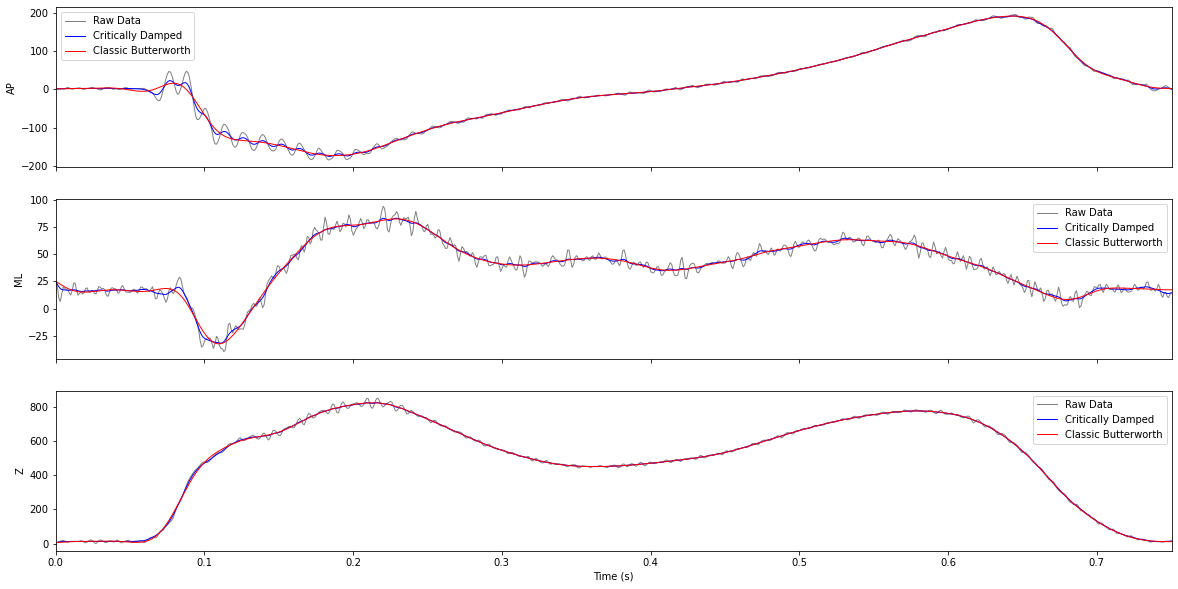

In [5]:
# Plotting the three different signals (Raw data, Classic Butter data and Critically Damped)
# You can add or not the Classic Butterworth filter with the parameter `plot_classic_butterworth = True / False`)
# The Classic Butterworth filter is calculated with the same parameters you entered for the Critically Damped one. 
# And saving or not the figure `save_plot = True` nad `plot_name = 'str'`). 

# If we call the function without defined the Damped before, we're asked to choose the order and the cutoff frequency. 
walking.plot_raw_and_filtered(plot_classic_butterworth = True, save_plot = True, plot_name = 'images/readme/walking')

#### Second Example: Running 

In [13]:
data = pd.read_csv('data/running.csv',delimiter=',', names = ['AP', 'ML', 'Z'])
running = Signal(data, 2000)

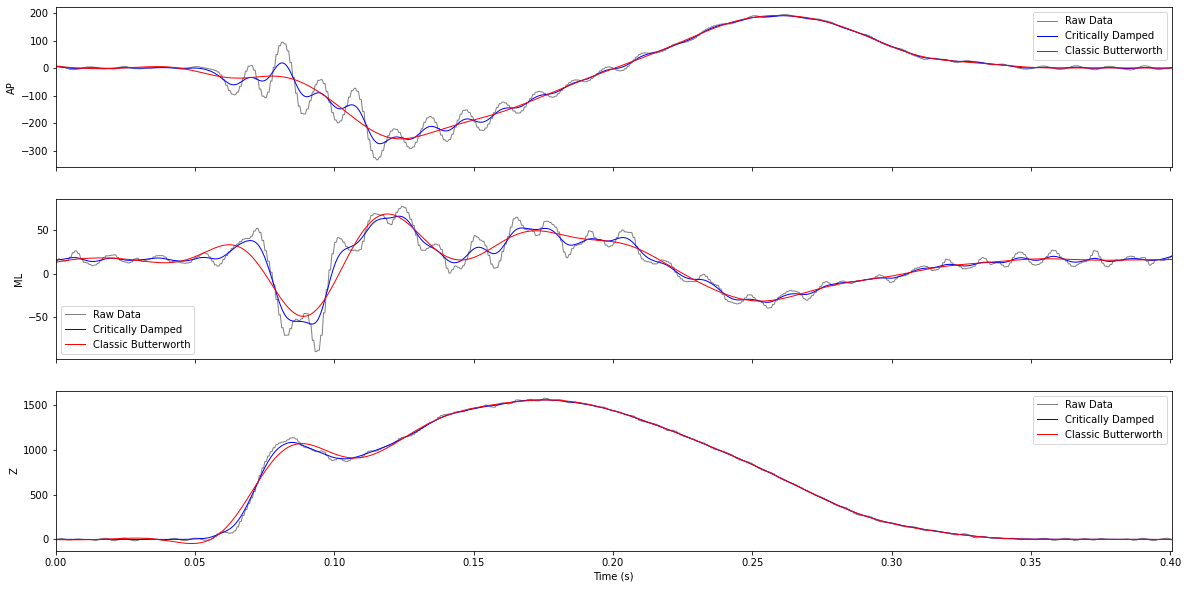

In [14]:
running.critically_damped(4, 25)
# No need to pass `plot_classic_butter = True` since it's the default parameter)
running.plot_raw_and_filtered(save_plot=True, plot_name='images/readme/running')

The effect of the Critically Damped Filter is more visible in this graphic (Z-axis, last subplot). As we can see, the Classic Filter with Butterworth leads to a little 'dump' before foot-strike. During this time, the force value is negative when we filter with Classic Butterworth (impossible in reality). As mentioned in Robsertson & Dowling paper, Critically Damped filters can be useful where there is a quick change of values in the data. Indeed, the filter doen't seem to affect the data during the following of the contact time. 